In [1]:
%load_ext autoreload
%autoreload 2

import comet_ml
from comet_ml import Experiment
import roboscientist
from roboscientist import datasets
from roboscientist.datasets import equations_settings
import sympy as snp
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from roboscientist.datasets.equations_utils import expr_to_tree

## Generate equation

In [2]:
np.random.seed(1389)
equation = datasets.equations_generation.generate_sin_cos(max_degree=2)

In [3]:
equation.add_observation(equation.domain_sample(n=100))

In [4]:
equation.expr

2.0*x0 + cos(x0) + 2.0

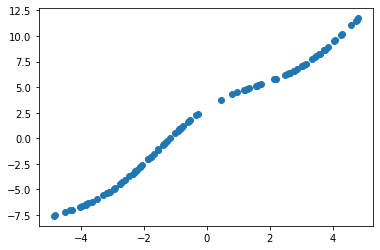

In [5]:
plt.scatter(equation.dataset[0][:, 0], equation.dataset[1]); 

In [6]:
print(equation.postfix, equation.variables)

([2.0, 2.0, 'x0', 'Mul', 'x0', 'cos', 'Add'], [0, 0, 0, 2, 0, 1, 3]) [x0]


In [7]:
D, _ = expr_to_tree(equation._expr)

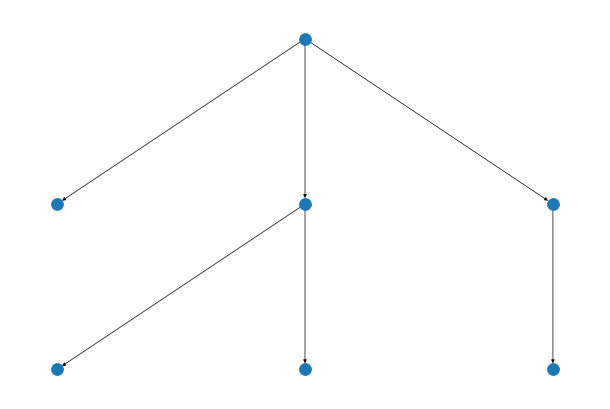

In [8]:
plt.figure(figsize=(12, 8), dpi=50)
pos = graphviz_layout(D, prog="dot")
nx.draw(D, pos)
plt.show()

## Brute force

In [9]:
from roboscientist.models import BruteForceSolver
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [10]:
from roboscientist.logger import SingleFormulaLogger

In [11]:
logger = SingleFormulaLogger('test', 'test', {})

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: schattengenie (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.27 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [12]:
solver = BruteForceSolver(logger=logger, max_time=10)

In [13]:
candidate_equations = solver.solve(equation, epochs=1)

636it [00:10, 63.52it/s]


In [14]:
candidate_equations[0]

Add(Mul(Float('1.9821277428278259', precision=53), Symbol('x0')), Float('1.0', precision=53))